## La méthode du gradient pour résoudre A x = b

Le but de ce TP est de vous laisser avancer tout seul. Reprenez les cours et programmez la méthode du gradient
pour résoudre le système matriciel $A {\bf x} = {\bf b}$ avec A symétrique et à diagonale dominante
($a_{ii} > \sum_{k \ne i} |a_{ik}|$).

* Commencez en 2D avec une matrice 2x2, vérifier que le résultat est bon et tracer la courbe de convergence
* Passez en nxn (on montrera que cela marche avec une matrice 9x9)

Il peut être intéressant de normaliser la matrice A pour éviter que les calculs explosent.

### 2x2

Je vais commencer avec une matrice 2x2 pour voir ce qui se passe avant de passer à nxn.

In [1]:
# plein de copier coller du cours

import numpy as np
import numpy.linalg as lin
import matplotlib.pylab as plt
import plotly.offline as py
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
N = 2

A = np.random.randint(-10, 10, size=(N,N))
A = A * 1.0                                            # pour passer en reels
A[np.diag_indices(N)] = 0.1 + np.abs(A).sum(axis=0)    # diag dominante
A = A + A.T                                            # symétrique
A = A / np.abs(A).sum(axis=0).mean()
b = np.random.randint(-10,10,size=(N))
print(A, "\n\n", b)

[[ 0.771 -0.229]
 [-0.229  0.771]] 

 [5 7]


In [3]:
def grad_J(x):
    return A@x - b

In [4]:
def minimum_J(start_value, µ=1.2, e = 0.001):
    x = [np.array(start_value)]
    while True:
        x.append(x[-1] - µ * grad_J(x[-1]))
        if np.sum(np.square(x[-1] - x[-2])) < e**2:
            break
        # la suite n'est que des tests pour se protéger
        if np.square(x[-1] - x[-2]).sum() > 1E9:  # au cas où on diverge
            print("DIVERGE")
            break
        if len(x) > 1000:  # c'est trop long, je crains la boucle infinie
            print('Trop long, boucle infinie ?')
            break
    return np.array(x)

x = minimum_J(np.zeros(N))

In [5]:
A @ x[-1] - b

array([-0., -0.])

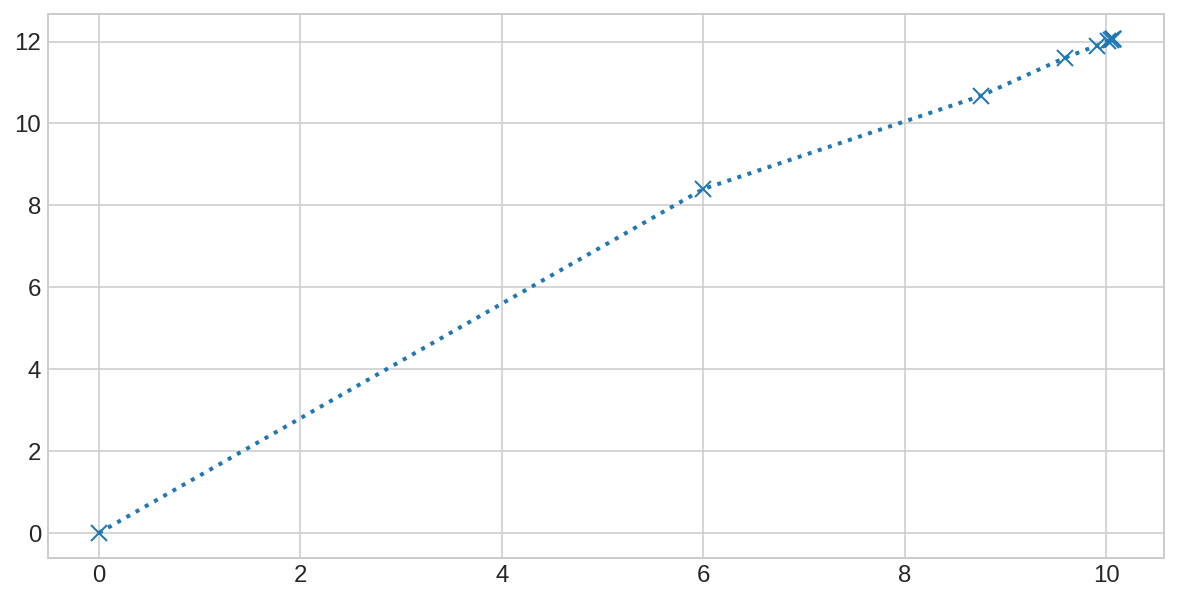

In [6]:
plt.plot(x[:,0], x[:,1], 'x:')

### nxn

Je passe à 9x9

In [7]:
N = 9

A = np.random.randint(-10, 10, size=(N,N))
A = A * 1.0                                            # pour passer en reels
A[np.diag_indices(N)] = 0.1 + np.abs(A).sum(axis=0)    # diag dominante
A = A + A.T                                            # symétrique
A = A / np.abs(A).sum(axis=0).mean()
b = np.random.randint(-10,10,size=(N))

In [8]:
x = minimum_J(np.zeros(N))

In [9]:
A @ x[-1] - b

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.])

In [10]:
print("Converge en %d itérations" % len(x))
x

Converge en 25 itérations


array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 6.   , -4.8  , -1.2  ,  8.4  ,  6.   , -6.   ,  0.   , -2.4  ,  1.2  ],
       [10.179, -4.229,  0.194,  9.286,  6.627, -7.379,  0.376, -2.5  ,  3.12 ],
       [12.994, -4.273,  0.906,  9.829,  6.807, -8.061,  0.837, -2.498,  3.699],
       [14.819, -4.329,  1.42 , 10.035,  6.919, -8.393,  1.173, -2.567,  4.015],
       [15.999, -4.397,  1.784, 10.131,  6.991, -8.581,  1.418, -2.664,  4.176],
       [16.764, -4.458,  2.046, 10.173,  7.038, -8.694,  1.588, -2.758,  4.259],
       [17.26 , -4.508,  2.234, 10.189,  7.069, -8.765,  1.705, -2.837,  4.302],
       [17.584, -4.547,  2.369, 10.193,  7.089, -8.812,  1.785, -2.899,  4.322],
       [17.796, -4.576,  2.464, 10.192,  7.101, -8.843,  1.838, -2.945,  4.331],
       [17.936, -4.597,  2.531, 10.189,  7.109, -8.864,  1.874, -2.98 ,  4.335],
       [18.027, -4.613,  2.578, 10.186,  7.115, -8.878,  1.898, -3.005,  4.336],
       [18.088, -4.624,  2.6

## Introduire de l'inertie

Introduire de l'inertie dans la méthode du gradient. Que constate-t-on ?

#### Réponse

Ajouter de l'inertie dans une méthode itérative veut dire qu'on avance moins vite vers le point suivant :
    
```python
x_next = ...
x = w * x_next + (1 - w) * x
```

avec `w` qui représente la force d'avancée (ou l'inverse du poids de l'inertie).

Dans le cas de la méthode du gradient cela donne :
```python
x_next = x - µ grad_J(x)
x = w * x_next + (1 - w) * x
```
ce qui se développe ainsi :

```python
x = w * (x - µ grad_J(x)) + (1 - w) x
```

ou 


```python
x = x - w * µ grad_J(x)
```

On voit donc qu'ajouter de l'inertie ne fait que modifier le paramètre µ qui justement sert à avancer plus
ou moins vite. µ est déjà une sorte d'inertie.

Donc cela ne change pas la méthode et cela n'amméliore pas l'algorithme.

## Valeur optimale de µ

On note que deux directions de pente sucessives sont orthogonales si le point suivant est le minumum dans
la direction donnée ($\nabla J ({\bf x}^k$)).

$$\nabla J ({\bf x}^{k+1})^T \; \nabla J ({\bf x}^k) = 0$$

#### Démonstration 


<table><tr>
    <th>
On veut régler µ pour arriver au minimum de J lorsqu'on avance dans la direction $- \nabla J({\bf x}^{k})$.
Cela veut dire que la dérivée partielle de $J({\bf x}^{k+1})$ par rapport à µ doit être
égale à 0 ou bien en faisant apparaitre µ dans l'équation :

$$
\frac{\partial J ({\bf x}^k - µ \; \nabla J ({\bf x}^k))}{\partial µ} = 0
$$

En développant on a

$$
\begin{align}
\frac{\partial J ({\bf x}^{k+1})}{\partial {\bf x}^{k+1}} \; 
\frac{\partial {\bf x}^{k+1}}{\partial µ} & = 0   \\
({\bf x}^{k+1} \, A - b) \, . \, (- \nabla J ({\bf x}^k)) & = 0 \\
(A\, {\bf x}^{k+1}  - b) \, . \, \nabla J ({\bf x}^k) & = 0 \quad \textrm{puisque A est symétrique}\\
\nabla J ({\bf x}^{k+1})  \, . \, \nabla J ({\bf x}^k) & = 0 \quad \textrm{CQFD}
\end{align}
$$


</th><th>
<img src="images/gradient.png" width = "400px"/>
</th></tr></table>


En utilisant cette propriété, évaluer la valeur optimale de µ pour atteindre le minimum dans la direction de
$\nabla J ({\bf x}^k)$.

Écrire le méthode du gradient avec le calcul du µ optimal à chaque itération pour résoudre $A {\bf x} = {\bf b}$.

#### Réponse

On reprend l'avant-dernière ligne de la démonstration et on remplace ${\bf x}^{k+1}$ par
${\bf x}^k - µ \, \nabla J({\bf x}^k)$ :

$$
\begin{align}
( A ({\bf x}^k - µ \, \nabla J({\bf x}^k)) - b ) \, . \, \nabla J ({\bf x}^k)  & = 0 \\
( A {\bf x}^k - b - µ \, A \, \nabla J({\bf x}^k) ) \, . \, \nabla J ({\bf x}^k)  & = 0 \\
( A {\bf x}^k - b ) \, . \, \nabla J ({\bf x}^k) - µ \, A \, \nabla J({\bf x}^k) \, . \, \nabla J ({\bf x}^k)  & = 0 \\
µ & = \frac{\nabla J ({\bf x}^k) \, . \, \nabla J ({\bf x}^k)}{A \, \nabla J({\bf x}^k) \, . \, \nabla J ({\bf x}^k) }
\end{align}
$$

In [11]:
def minimum_J(start_value, e = 0.001):
    x = [np.array(start_value)]
    while True:
        gradJ = grad_J(x[-1])
        µ = np.dot(gradJ, gradJ) / np.dot(A @ gradJ, gradJ)
        x.append(x[-1] - µ * gradJ)
        if np.sum(np.square(x[-1] - x[-2])) < e**2:
            break
        # la suite n'est que des tests pour se protéger
        if np.square(x[-1] - x[-2]).sum() > 1E9:  # au cas où on diverge
            print("DIVERGE")
            break
        if len(x) > 1000:  # c'est trop long, je crains la boucle infinie
            print('Trop long, boucle infinie ?')
            break
    return np.array(x)

In [12]:
x = minimum_J(np.zeros(N))
A @ x[-1] - b

array([-0., -0., -0.,  0., -0., -0., -0.,  0., -0.])

In [13]:
print("Converge en %d itérations" % len(x))
x

Converge en 18 itérations


array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.529, -6.023, -1.506, 10.54 ,  7.529, -7.529,  0.   , -3.011,  1.506],
       [13.336, -2.992,  1.707,  8.933,  6.369, -7.844,  0.737, -2.253,  4.794],
       [15.533, -4.744,  1.312, 10.541,  7.018, -8.683,  1.346, -2.537,  3.779],
       [16.938, -4.161,  2.255,  9.914,  7.033, -8.615,  1.556, -2.746,  4.59 ],
       [17.501, -4.627,  2.231, 10.322,  7.079, -8.836,  1.787, -2.856,  4.222],
       [17.865, -4.503,  2.534, 10.111,  7.114, -8.823,  1.83 , -2.951,  4.424],
       [18.014, -4.635,  2.542, 10.225,  7.11 , -8.885,  1.904, -2.994,  4.308],
       [18.113, -4.606,  2.636, 10.158,  7.123, -8.883,  1.913, -3.028,  4.361],
       [18.154, -4.644,  2.64 , 10.19 ,  7.12 , -8.901,  1.936, -3.042,  4.326],
       [18.182, -4.637,  2.669, 10.17 ,  7.124, -8.9  ,  1.938, -3.053,  4.34 ],
       [18.193, -4.648,  2.67 , 10.179,  7.123, -8.905,  1.944, -3.058,  4.33 ],
       [18.201, -4.646,  2.6